In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    distinct_rows = N

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [7]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.15, 0.3, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


31.54275834042402
40.557053864202715
40.498700243650816
46.447210499687436
63.61771998714154
103.09877461921913
98.06657873303288
94.82431844007704
85.61324666733364
67.34543635124552
68.78630612771008
62.89581784885955
55.05890944719168
53.198569656425036
51.58769919524241
46.98973296595308
45.89610657433751
42.58596044857527
39.78485456466972
42.15633446664091
38.975154073055975
36.576372564238945
35.31360362236654
33.753686030404594
30.8776130682538
30.631676286355333
29.54525730118823
28.154746494196985
27.34643334634697
27.803810662971483
[31.54275834042402, 40.557053864202715, 40.498700243650816, 46.447210499687436, 63.61771998714154, 103.09877461921913, 98.06657873303288, 94.82431844007704, 85.61324666733364, 67.34543635124552, 68.78630612771008, 62.89581784885955, 55.05890944719168, 53.198569656425036, 51.58769919524241, 46.98973296595308, 45.89610657433751, 42.58596044857527, 39.78485456466972, 42.15633446664091, 38.975154073055975, 36.576372564238945, 35.31360362236654, 33.75

In [9]:
x_data = np.linspace(0.15, 0.3, 30)
print(x_data)

y_data =[31.54275834042402, 40.557053864202715, 40.498700243650816, 46.447210499687436, 63.61771998714154, 103.09877461921913, 98.06657873303288, 94.82431844007704, 85.61324666733364, 67.34543635124552, 68.78630612771008, 62.89581784885955, 55.05890944719168, 53.198569656425036, 51.58769919524241, 46.98973296595308, 45.89610657433751, 42.58596044857527, 39.78485456466972, 42.15633446664091, 38.975154073055975, 36.576372564238945, 35.31360362236654, 33.753686030404594, 30.8776130682538, 30.631676286355333, 29.54525730118823, 28.154746494196985, 27.34643334634697, 27.803810662971483]



[0.15       0.15517241 0.16034483 0.16551724 0.17068966 0.17586207
 0.18103448 0.1862069  0.19137931 0.19655172 0.20172414 0.20689655
 0.21206897 0.21724138 0.22241379 0.22758621 0.23275862 0.23793103
 0.24310345 0.24827586 0.25344828 0.25862069 0.2637931  0.26896552
 0.27413793 0.27931034 0.28448276 0.28965517 0.29482759 0.3       ]


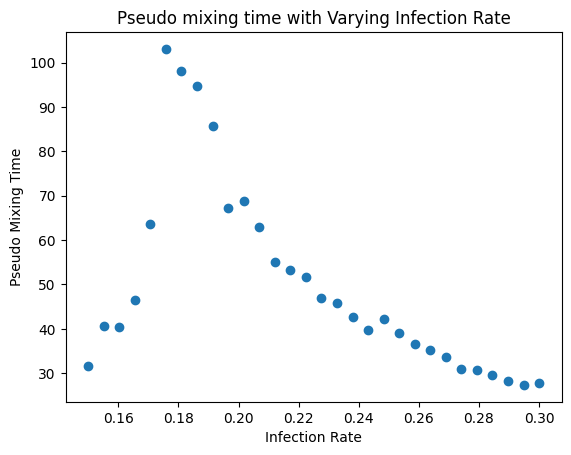

In [11]:
plt.plot(x_data, y_data, 'o', label ='data')
plt.title('Pseudo mixing time with Varying Infection Rate')
plt.xlabel('Infection Rate')
plt.ylabel('Pseudo Mixing Time')
plt.show()


This is a little choppy-- let's average over 20 trials instead.


In [12]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.15, 0.3, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(20):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/20)
    print(t_p_mixing/20)

print(p_mixing_times)


29.920496238433753
35.7666859432045
42.23458470516503
54.98600901852551
68.75985866082237
89.58993653992799
98.13254894960617
98.27349091899693
81.52769063178856
77.173649631893
69.67277777239896
65.67503383822509
59.71970584706977
56.62281327181589
51.944713142699456
50.238617936534
48.16094426611236
43.566736765201966
40.274897543315916
40.2387052078809
39.46115699485342
37.75023748577523
35.34441926088198
33.64300950274537
31.90998500920357
31.87810204398333
29.76256552374275
29.070961177823495
27.436698226189538
28.170225400720618
[29.920496238433753, 35.7666859432045, 42.23458470516503, 54.98600901852551, 68.75985866082237, 89.58993653992799, 98.13254894960617, 98.27349091899693, 81.52769063178856, 77.173649631893, 69.67277777239896, 65.67503383822509, 59.71970584706977, 56.62281327181589, 51.944713142699456, 50.238617936534, 48.16094426611236, 43.566736765201966, 40.274897543315916, 40.2387052078809, 39.46115699485342, 37.75023748577523, 35.34441926088198, 33.64300950274537, 31.9

In [13]:
x_data = np.linspace(0.15, 0.3, 30)
print(x_data)

y_data =[29.920496238433753, 35.7666859432045, 42.23458470516503, 54.98600901852551, 68.75985866082237, 89.58993653992799, 98.13254894960617, 98.27349091899693, 81.52769063178856, 77.173649631893, 69.67277777239896, 65.67503383822509, 59.71970584706977, 56.62281327181589, 51.944713142699456, 50.238617936534, 48.16094426611236, 43.566736765201966, 40.274897543315916, 40.2387052078809, 39.46115699485342, 37.75023748577523, 35.34441926088198, 33.64300950274537, 31.90998500920357, 31.87810204398333, 29.76256552374275, 29.070961177823495, 27.436698226189538, 28.170225400720618]



[0.15       0.15517241 0.16034483 0.16551724 0.17068966 0.17586207
 0.18103448 0.1862069  0.19137931 0.19655172 0.20172414 0.20689655
 0.21206897 0.21724138 0.22241379 0.22758621 0.23275862 0.23793103
 0.24310345 0.24827586 0.25344828 0.25862069 0.2637931  0.26896552
 0.27413793 0.27931034 0.28448276 0.28965517 0.29482759 0.3       ]


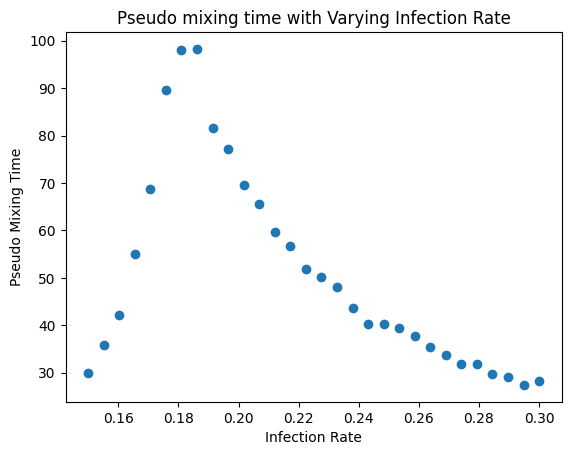

In [14]:
plt.plot(x_data, y_data, 'o', label ='data')
plt.title('Pseudo mixing time with Varying Infection Rate')
plt.xlabel('Infection Rate')
plt.ylabel('Pseudo Mixing Time')
plt.show()


now fit the model to both mixing time and pseudo mixing time plots

In [15]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.22, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

times, R = find_tranformation_matrix(10, E, N, Tmax)

p_mixing_times = []
mixing_times = []

for i in range(len(b)):
    t_mixing = 0
    t_p_mixing = 0
    times, R = find_tranformation_matrix(b[i], E, N, Tmax)
    if np.round(times[-1]) == Tmax:
        print('no extinction') 
        mixing_times.append(Tmax)
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
            p_mix_index = np.min(np.where(R==1)[0])
            t_p_mixing += times[p_mix_index]
    else:
        print('system does go extinct')
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E, N, Tmax)
            p_mix_index = np.min(np.where(R==1)[0])
            t_mixing += times[-1]
            t_p_mixing += times[p_mix_index]
        mixing_times.append(t_mixing/10)
    p_mixing_times.append(t_p_mixing/10)
    print(mixing_times[-1])
    print(t_p_mixing/10)


print(mixing_times)
print(p_mixing_times)


system does go extinct
8.815350155922246
7.658081188347526
system does go extinct
8.62145798141347
7.552583559840814
system does go extinct
9.128671011152928
7.633539059747707
system does go extinct
8.981582818992424
7.9082949734429535
system does go extinct
9.47849483761443
8.15975684462772
system does go extinct
10.366722937243662
8.932302005973252
system does go extinct
10.2346924844105
9.499811256932578
system does go extinct
11.410743410107631
9.449622460665463
system does go extinct
11.277485977590635
9.55836764055606
system does go extinct
12.108482067952398
10.201136651651549
system does go extinct
14.089759645458182
11.355399738586614
system does go extinct
14.65525769811319
13.174337652494193
system does go extinct
15.282434720518523
12.604977641801339
system does go extinct
16.80107179546971
13.701324457766878
system does go extinct
16.123417252351665
14.263302770050752
system does go extinct
19.346633215803347
15.40194182627053
system does go extinct
21.276872019618814
17.7

In [17]:
mixing = [8.815350155922246, 8.62145798141347, 9.128671011152928, 8.981582818992424, 9.47849483761443, 10.366722937243662, 10.2346924844105, 11.410743410107631, 11.277485977590635, 12.108482067952398, 14.089759645458182, 14.65525769811319, 15.282434720518523, 16.80107179546971, 16.123417252351665, 19.346633215803347, 21.276872019618814, 22.69427498016313, 28.1670750489255, 36.98515792421008, 40.17095789023496, 66.35902649930959, 97.03853271595307, 278.16198809065753, 500, 500, 500, 500, 500, 500]
b =np.linspace(0.00002, 0.22, 30)
print(b)
pseudo_mixing = [7.658081188347526, 7.552583559840814, 7.633539059747707, 7.9082949734429535, 8.15975684462772, 8.932302005973252, 9.499811256932578, 9.449622460665463, 9.55836764055606, 10.201136651651549, 11.355399738586614, 13.174337652494193, 12.604977641801339, 13.701324457766878, 14.263302770050752, 15.40194182627053, 17.794108540167, 20.20033526730103, 23.326694338579035, 27.096726432571415, 34.328236322180956, 44.29915635758798, 58.60119296788789, 83.76754487450326, 84.36962842558218, 94.27867453167903, 67.66972766259413, 60.623643265009925, 56.65612438885976, 50.09028212626216]


[2.00000000e-05 7.60551724e-03 1.51910345e-02 2.27765517e-02
 3.03620690e-02 3.79475862e-02 4.55331034e-02 5.31186207e-02
 6.07041379e-02 6.82896552e-02 7.58751724e-02 8.34606897e-02
 9.10462069e-02 9.86317241e-02 1.06217241e-01 1.13802759e-01
 1.21388276e-01 1.28973793e-01 1.36559310e-01 1.44144828e-01
 1.51730345e-01 1.59315862e-01 1.66901379e-01 1.74486897e-01
 1.82072414e-01 1.89657931e-01 1.97243448e-01 2.04828966e-01
 2.12414483e-01 2.20000000e-01]


1.3326891629842965
0.22444004707136922
[  8.60192398   9.00527382   9.44293487   9.91923471  10.43923841
  11.00890949  11.63531455  12.32688548  13.0937593   13.94822333
  14.90530536  15.98356685  17.20618404  18.60244608  20.20986767
  22.07722954  24.2690505   26.87234085  30.00709311  33.84314201
  38.62833691  44.73786673  52.76556865  63.70501735  79.34126718
 103.20043882]


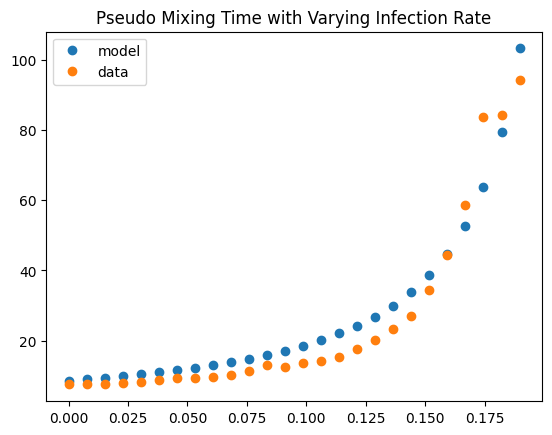

In [30]:
from scipy.optimize import curve_fit
N = 2000
x_data = [2.00000000e-05, 7.60551724e-03, 1.51910345e-02, 2.27765517e-02,
 3.03620690e-02, 3.79475862e-02, 4.55331034e-02, 5.31186207e-02,
 6.07041379e-02, 6.82896552e-02, 7.58751724e-02, 8.34606897e-02,
 9.10462069e-02, 9.86317241e-02, 1.06217241e-01, 1.13802759e-01,
 1.21388276e-01, 1.28973793e-01, 1.36559310e-01, 1.44144828e-01,
 1.51730345e-01, 1.59315862e-01, 1.66901379e-01, 1.74486897e-01,
 1.82072414e-01, 1.89657931e-01]
y_data = [7.658081188347526, 7.552583559840814, 7.633539059747707, 7.9082949734429535, 8.15975684462772, 8.932302005973252, 9.499811256932578, 9.449622460665463, 9.55836764055606, 10.201136651651549, 11.355399738586614, 13.174337652494193, 12.604977641801339, 13.701324457766878, 14.263302770050752, 15.40194182627053, 17.794108540167, 20.20033526730103, 23.326694338579035, 27.096726432571415, 34.328236322180956, 44.29915635758798, 58.60119296788789, 83.76754487450326, 84.36962842558218, 94.27867453167903]


# Define the Model
def func(x, a, b):
    y_res = (np.log(N) + 1) / (1-(x/b))**a
    return y_res

params, cov = curve_fit(func, x_data, y_data)
  
fitA = params[0]
fitB = params[1]

print(fitA)
print(fitB)
fity = func(x_data, fitA, fitB)
print(fity)

import matplotlib.pyplot as plt
plt.plot(x_data, fity, 'o', label ='model')
plt.plot(x_data, y_data, 'o', label ='data')
plt.title('Pseudo Mixing Time with Varying Infection Rate')
plt.legend()
plt.show()


0.8294435825279592
0.17624738529011363
[ 8.60171208  8.92141833  9.26856391  9.64697056 10.06121776 10.51684255
 11.02060666 11.58085907 12.20803658 12.91536836 13.71988894 14.64393096
 15.71738718 16.98125165 18.49337808 20.33827912 22.64474067 25.61972194
 29.6195024  35.31721422 44.16626946 60.04018591 98.28709595]


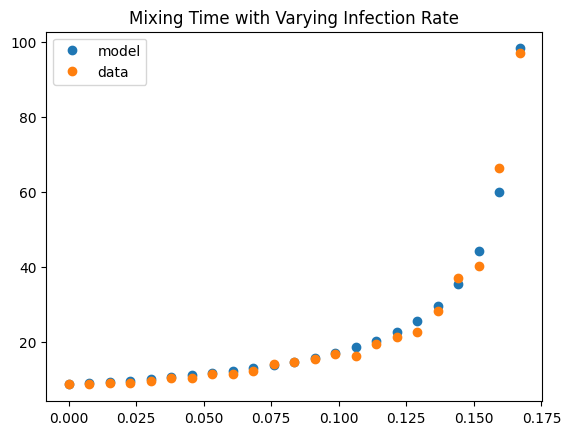

In [29]:
from scipy.optimize import curve_fit
N = 2000
x_data = [2.00000000e-05, 7.60551724e-03, 1.51910345e-02, 2.27765517e-02,
 3.03620690e-02, 3.79475862e-02, 4.55331034e-02, 5.31186207e-02,
 6.07041379e-02, 6.82896552e-02, 7.58751724e-02, 8.34606897e-02,
 9.10462069e-02, 9.86317241e-02, 1.06217241e-01, 1.13802759e-01,
 1.21388276e-01, 1.28973793e-01, 1.36559310e-01, 1.44144828e-01,
 1.51730345e-01, 1.59315862e-01, 1.66901379e-01]
y_data =  [8.815350155922246, 8.62145798141347, 9.128671011152928, 8.981582818992424, 9.47849483761443, 10.366722937243662, 10.2346924844105, 11.410743410107631, 11.277485977590635, 12.108482067952398, 14.089759645458182, 14.65525769811319, 15.282434720518523, 16.80107179546971, 16.123417252351665, 19.346633215803347, 21.276872019618814, 22.69427498016313, 28.1670750489255, 36.98515792421008, 40.17095789023496, 66.35902649930959, 97.03853271595307]

# Define the Model
def func(x, a, b):
    y_res = (np.log(N) + 1) / (1-(x/b))**a
    return y_res

params, cov = curve_fit(func, x_data, y_data)
  
fitA = params[0]
fitB = params[1]

print(fitA)
print(fitB)
fity = func(x_data, fitA, fitB)
print(fity)

import matplotlib.pyplot as plt
plt.plot(x_data, fity, 'o', label ='model')
plt.plot(x_data, y_data, 'o', label ='data')
plt.title('Mixing Time with Varying Infection Rate')
plt.legend()
plt.show()


Let's average over 20 trials instead of 10 trials

In [4]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.22, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []
mixing_times = []

for i in range(len(b)):
    t_mixing = 0
    t_p_mixing = 0
    times, R = find_tranformation_matrix(b[i], E, N, Tmax)
    if np.round(times[-1]) == Tmax:
        print('no extinction') 
        mixing_times.append(Tmax)
        for j in range(20):
            times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
            p_mix_index = np.min(np.where(R==1)[0])
            t_p_mixing += times[p_mix_index]
    else:
        print('system does go extinct')
        for j in range(20):
            times, R = find_tranformation_matrix(b[i], E, N, Tmax)
            p_mix_index = np.min(np.where(R==1)[0])
            t_mixing += times[-1]
            t_p_mixing += times[p_mix_index]
        mixing_times.append(t_mixing/20)
    p_mixing_times.append(t_p_mixing/20)
    print(mixing_times[-1])
    print(t_p_mixing/20)


print(mixing_times)
print(p_mixing_times)


system does go extinct
8.182308621621802
7.299218050403299
system does go extinct
8.349453433762418
7.509970947414308
system does go extinct
8.715817862529374
7.682478126401878
system does go extinct
8.668668006955462
7.844252048510586
system does go extinct
9.995601016377446
8.318871590076919
system does go extinct
9.741228732206505
8.284295225177637
system does go extinct
9.747285554379754
8.728984790036517
system does go extinct
10.751022082748522
9.132149016796383
system does go extinct
11.14360310290036
9.78048290316028
system does go extinct
12.145856117374473
10.463079211109667
system does go extinct
12.444755801073548
10.784952474958887
system does go extinct
14.415726590071639
12.008798820733597
system does go extinct
15.095686618319263
13.009268141727432
system does go extinct
14.818988111644103
12.876837504143406
system does go extinct
17.166080163347488
14.769821455923074
system does go extinct
18.560398663418347
16.495291813909525
system does go extinct
22.720779633387934


0.8584679550151063
0.19188091423877962
[  8.60167214   8.90476612   9.23197105   9.58636897   9.97159864
  10.39198833  10.85272894  11.36010218  11.92178586  12.54726857
  13.24842229  14.04030899  14.94234053  15.97998881  17.18737769
  18.61134149  20.31802296  22.40409968  25.01694881  28.39340373
  32.94091853  39.42799736  49.50764441  67.54762487 110.45734061]


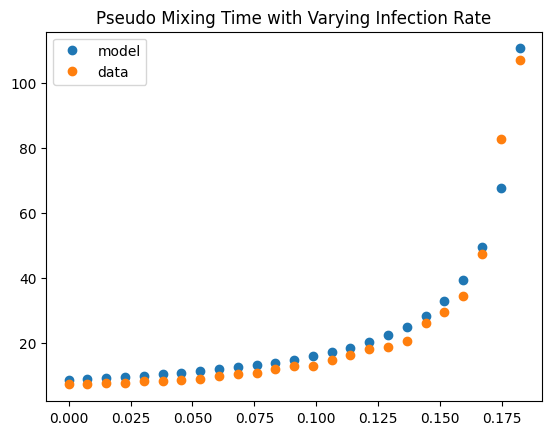

In [5]:
from scipy.optimize import curve_fit
N = 2000
x_data =[2.00000000e-05, 7.60551724e-03, 1.51910345e-02, 2.27765517e-02,
 3.03620690e-02, 3.79475862e-02, 4.55331034e-02, 5.31186207e-02,
 6.07041379e-02, 6.82896552e-02, 7.58751724e-02, 8.34606897e-02,
 9.10462069e-02, 9.86317241e-02, 1.06217241e-01, 1.13802759e-01,
 1.21388276e-01, 1.28973793e-01, 1.36559310e-01, 1.44144828e-01,
 1.51730345e-01, 1.59315862e-01, 1.66901379e-01, 1.74486897e-01,
 1.82072414e-01]
y_data = [7.299218050403299, 7.509970947414308, 7.682478126401878, 7.844252048510586, 8.318871590076919, 8.284295225177637, 8.728984790036517, 9.132149016796383, 9.78048290316028, 10.463079211109667, 10.784952474958887, 12.008798820733597, 13.009268141727432, 12.876837504143406, 14.769821455923074, 16.495291813909525, 18.11389280715377, 18.835694993222585, 20.705053494336344, 26.155470145041004, 29.442322121537558, 34.46715672569311, 47.26841356610216, 82.71623597891858, 106.965464590771]



# Define the Model
def func(x, a, b):
    y_res = (np.log(N) + 1) / (1-(x/b))**a
    return y_res

params, cov = curve_fit(func, x_data, y_data)
  
fitA = params[0]
fitB = params[1]

print(fitA)
print(fitB)
fity = func(x_data, fitA, fitB)
print(fity)

import matplotlib.pyplot as plt
plt.plot(x_data, fity, 'o', label ='model')
plt.plot(x_data, y_data, 'o', label ='data')
plt.title('Pseudo Mixing Time with Varying Infection Rate')
plt.legend()
plt.show()


0.7140668474048981
0.17453744763533113
[ 8.60160629  8.87893033  9.17873317  9.5040432   9.85847637 10.2463888
 10.67308033 11.14507013 11.67047629 12.25954885 12.92543458 13.68530186
 14.56204243 15.5869327  16.80395922 18.27718308 20.10400187 22.44077452
 25.55699207 29.96448339 36.78320056 49.09609521 80.34785566]


c:\Users\sharm\anaconda3\envs\iibproject\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in power
  del sys.path[0]


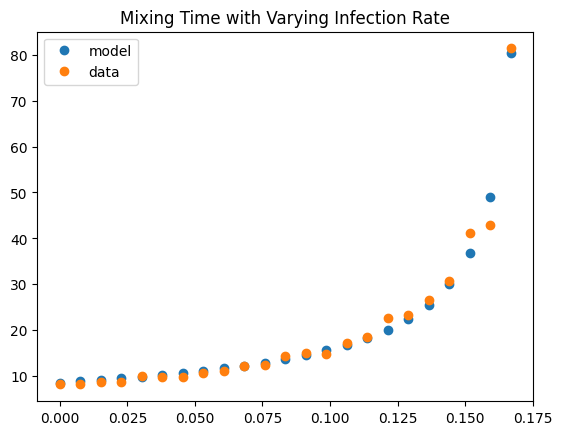

In [6]:
from scipy.optimize import curve_fit
N = 2000
x_data = [2.00000000e-05, 7.60551724e-03, 1.51910345e-02, 2.27765517e-02,
 3.03620690e-02, 3.79475862e-02, 4.55331034e-02, 5.31186207e-02,
 6.07041379e-02, 6.82896552e-02, 7.58751724e-02, 8.34606897e-02,
 9.10462069e-02, 9.86317241e-02, 1.06217241e-01, 1.13802759e-01,
 1.21388276e-01, 1.28973793e-01, 1.36559310e-01, 1.44144828e-01,
 1.51730345e-01, 1.59315862e-01, 1.66901379e-01]
y_data =  [8.182308621621802, 8.349453433762418, 8.715817862529374, 8.668668006955462, 9.995601016377446, 9.741228732206505, 9.747285554379754, 10.751022082748522, 11.14360310290036, 12.145856117374473, 12.444755801073548, 14.415726590071639, 15.095686618319263, 14.818988111644103, 17.166080163347488, 18.560398663418347, 22.720779633387934, 23.419183189491733, 26.58318001068927, 30.77375925257262, 41.100094880490474, 42.84087986698753, 81.35137717267484]

# Define the Model
def func(x, a, b):
    y_res = (np.log(N) + 1) / (1-(x/b))**a
    return y_res

params, cov = curve_fit(func, x_data, y_data)
  
fitA = params[0]
fitB = params[1]

print(fitA)
print(fitB)
fity = func(x_data, fitA, fitB)
print(fity)

import matplotlib.pyplot as plt
plt.plot(x_data, fity, 'o', label ='model')
plt.plot(x_data, y_data, 'o', label ='data')
plt.title('Mixing Time with Varying Infection Rate')
plt.legend()
plt.show()


In [8]:
import numpy as np
x = np.array([-1/3, -1/3, 1/2, -1, -1, 1/2])

A = np.array([[-1, -1, 0, 0, 1/3, 1/3],
             [0, 0, -1, -1, 1/3, 1/3],
             [0, -1, 0, 0, 0, -1/2],
             [0, 0, 0, -1, 0, 1],
             [-1, 0, 0, 1, 0, 0],
             [0, 0, -1, 0, -1/2, 0]])
print(np.shape(A))
A_inv = np.linalg.inv(A)

b = np.dot(A_inv, x)
print(b)

(6, 6)
[13. -6. -5. 12.  9. 11.]
